# How We, Two Beginners, Placed in Kaggle Competition Top 4%
https://towardsdatascience.com/how-we-two-beginners-placed-in-kaggle-competition-top-4-3ea508638f2d

Kaggle Korea아 단톡방에서 꽤 괜찮은 글이 올라와서 리뷰를 하려고 한다. 아무래도 빅데이터 기반 아이디어 및 기획 경진대회에서는 수상을 한 경험이 다수 있으나, 성능만 제일 중요시되는 경진대회에서는 Dacon 스타크래프트 7위 기록이 최고점이라서 도움을 받고자한다.

가장 보편적으로 접근하는 방법은
1. 기술 수준
2. 접근 방식
으로 나뉘는 것 같다.

# 기술 수준(Technical Tips & Tricks)

## Engineer the heck out of those features.
제일 중요한 것은 Feature Engineering이다. Feature Engineering을 간단하게 말하면 기존의 것을 사용하거나 추가하는 것이다. 두개의 컬럼을 곱하는 것처럼 간단할 수도 있다.

대부분의 모델이 데이터로부더 잘 학습을 하기 위해서는 사람의 도움이 필요하다.

특성공학에서 도움이 될만한 2개의 아이디어는,
- PCA/feature reduction
 - 이 방법은 상당히 훌륭한 특성공학이고, "모델이 작동하는데 가장 중요한 구조가 여기 있습니다."라고 말하는 것과 같다. 데이터를 축소하거나 PCA로 만든 특성을 다시 데이터에 Merge시킬 수도 있음. 다른 manifold-learning/feature reduction methods 방법도 좋다.
 - 막 대단한 성능 향상이 있는 것은 아니였는데, 성능 향상이 있긴 했음.
- Add statistics
 - 서로 비교 가능한 척도에 있는 열이 많으면 평균 및 분산과 같은 단순 통계량뿐만 아니라 첨도 또는 치우침과 같은 고차 통계량(higher-order)을 추가할 수도있다.
 - 이 글에 꽤 좋은 예시가 있다. LA의 자동차 이동, 산타모니카의 자동차 이동 등의 분산은 날씨의 이질적인 영향에 대한 유용한 정보를 제공할 수 있다. 만약 낮은 분산을 띄면, 날씨는 모든 도시에 매우 비슷한 영향을 끼친다고 볼 수 있다 라는 예시다.


특성공학은 예술이다. 가장 중요한 것은 데이터의 맥락을 염두에 두고 특성공학을 진행한다는 것입니다. 실제 생활에서 의미가 없는 경우(예: 서로 관계가 없는 두 개의 열을 곱하는 경우),모델에게 도움이 되지 않을 수 있습니다.

## Be stringent with your feature selection
특성공학(Feature Engineering)도 중요하지만, 너무 많은 데이터가 모형을 압도하고, 무엇이 중요한지 배우는데 어려움을 줄 수 있다는 사실을 기억하는 것도 중요하다. 어떤 특성(Features)을 넣거나 빼는 것이 모델에 큰 도움이 될 수 있습니다.

일반적으로 열을 제거할 때 좀 더 보수적이 되도록 노력하자. 데이터는 소중하므로 도움이 되지 않을 경우에만 폐기하는 것이 좋다.

- Look closely at the data
 - 범주형 변수가 맣으면 중복행이 있을 수 있다. 예를 들어, 때때로 대회에서 Target 값이 항상 0인 '관리 그룹' 샘플이 있다. 일반적으로 이것을 제거하는 것이 도움이 된다.
- Information gain
 - 최종 모델의 예측을 위해 각 변수(Feature)가 제공하는 정보 이득을 계산한 다음, 거의 정보를 제공하지 않는 변수를 제거할 수도 있다.
- Variance threshold(분산 임계값)
 - 정보 이득의 섹시하지 않은 버전(가끔 더 실용적)이다.각 열의 분산을 계산하고 분산이 거의 없는 열을 제거합니다(필요한 Scaling을 진행한 뒤).
- Feature reduction
 - 상관 관계가 높은 여러 변수를 찾았을 경우, 차원이 다른 버전으로 교체하는 것이 도움이 될 수 있다. 일반적으로 덜 '중요한' 변수를 제거하는 것이 아니라 줄이는 것 자체를 목표로 해야한다. 이렇게 하면 여전히 어떤 정보가 있는지 알 수 있습니다.

## Understand the metric and design the solution with it in mind.

Kaggle은 리더보드에서 순위를 결정하는 특정 평가지표(metric)에 따라 솔루션을 평가합니다. 때로는 AUC(Area Under Curve)나 로그 손실과 같은 경우도 있습니다. 캐글은 경기 개요의 'Evaluation' 섹션에서 항상 공식으로 제공한다.


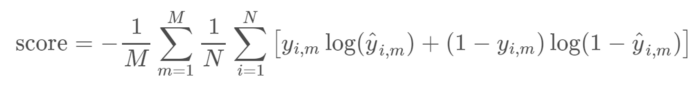

평가지표는 항상 검토할 가치가 있다. 왜냐하면 어떻게 솔루션을 구축해야 할지를 결정할 수 있기 때문이다. 예를 들어, 평가 함수와 매우 유사한 특정 손실 함수를 사용하면 해당 메트릭에 따라 모형의 성능이 향상된다는 것을 알 수 있다.


Log-loss를 예시로 들어보자. 일부 인터넷 조사에서는 다음과 같은 유용한 정보를 얻을 수 있습니다.
- Log-loss는 틀린 답에 상당한 불이익을 준다. 즉, 예측에 더 자신감이 있을수록 잘못된 예측에 대한 벌칙이 매우 빠르게 상승한다.

이런 것과 비슷하게 생각해봐야할 부분들이 많다.
- 체계적인 오류(즉, 모델이 데이터를 이해하지 못하는 경우)가 있기 때문에, 로그 손실(log-loss)로 인해 모델이 제대로 작동하지 않는다고 가정해 보겠습니다. 만약 모델이 틀린 답을 얻게 된다면, 적어도 그것들에 대해 자신감(높은 신뢰)을 가져서는 안 되기 때문에, 모델을 더 '서두르게(hesitant)' 만드는 것이 도움이 될 수 있다. 데이터를 늘리거나(적절한 경우) 모델의 신뢰도를 떨어뜨리면 모델별로 이 작업을 수행할 수 있습니다. 또한, 'Target 값 자르기(target clipping)'로 간단히 적용할 수 있다. 예측값이 1% 미만 또는 99%보다 크면 각각 1%와 99%로 자르기만 하면 됩니다. (물론 여기서 살펴봐야 할 또 다른 방향은 어떻게 하면 모델에 체계적인 오류가 덜 생기게 하고 데이터를 더 잘 이해할 수 있는가 하는 것이다.)
- 반면에, 모델은 데이터를 잘 이해할 수 있습니다. 체계적 오류 대신, 모델은 종종 너무 망설이는 정밀 오차에 더 가깝다. 이는 새로운 조사 방향을 제시한다. 즉, 예측 신뢰도를 더 일정하고 신뢰할 수 있는 것으로 알려진 Bagging 또는 다른 앙상블 접근 방식을 시도할 수 있습니다.

이러한 종류의 사고는 데이터 과학의 창의적이고 재미있는 측면이다. 수학적인 지식을 실제 기술로 바꿀 수 있는 것입니다.

## Modeling
모델링은 반복적이고 지루하다.
- Build
- fine-tune
- evaluate
- repeat

하지만 충분히 공부해야할 중요한 부분이기도 하다.


- Pretraining
 - 비지도 방식이거나 점수가 매겨지지 않은 데이터(교육 세트에는 제공되지만 테스트 세트에는 제공되지 않는 데이터)가 있는 경우 모델을 실행하여 사전 교육(Pretraining)에 사용할 수 있다. 
- Nonlinear topologies
  - 이러한 유형의 신경망은 순차적(Sequential)이지 않다. 대신, 한 계층은 여러 계층으로 분기될 수 있으며, 나중에 다른 지점에서 다시 결합할 수 있다. Keras API를 활용하면 쉽게 구현이 가능함. 예를 들어, 이미지 데이터를 필터 크기가 다른 두 개의 컨볼루션 레이어로 분할할 수 있다. 두 개의 컨볼루션 레이어는 다른 규모의 표현을 배우고 나중에 각자의 지식을 결합한다.
- Wacky, mad-scientist solutions
 - DeepInsight 모델은 엉뚱하고 미친 과학적인 해결책의 좋은 예이다. 이 접근은 대단히 인기가 있었고 행동 메커니즘 대회(Mechanisms of Action competition)에서 성공적이었다고 한다.그것은 시각적 치수 감소 방법인 t-SNE를 사용하여 표 형식의 데이터를 이미지로 변환한 다음, 그것에 대한 컨볼루션 신경망을 훈련시켰다.

마지막으로, 몇 가지 더 시도해 볼 아이디어를 생각해보자.: 앙상블의 예측을 결합하는 창조적인 방법, ReLU(예: Leaky ReLU, Swish), non-tree 모델(예: 한 모델의 예측을 다른 모델로 전달하여 오류를 학습하는 것)을 위한 '부스팅'.

요점은 모델링이 모든 사람을 위한 것이라는 것입니다. 정교하고 성공적인 모델을 개발하기 위해 TensorFlow의 소스 코드를 작성할 필요까지는 없다. 우리에게 필요한 것은 창의성과 아이디어를 시험해 보는 의지일 뿐이다.


# Strategic Tips & Tricks
이러한 트립(Trip)과 트릭은 Kaggle 대회에서 우리의 전략과 마음 상태와 더 관련이 있다.


## Check the discussion board often
아이디어를 내는 것은 어렵다고 한다. 그렇기 떄문에 정보를 친절히 공유해주는 사람들에게 기대어 보는 것도 나쁘지 않은 선택이라고 한다.
- Dacon이 절대로 Kaggle을 따라잡을 수 없는 이유가 여기서 나오는 것 같다..

시도해야 할 아이디어들이 너무 많고, 토론 게시판(discussion board)을 주기적으로 점검하는 것은 어떤 것이 효과가 있고 어떤 것이 그렇지 않은지를 이해하는 데 도움이 될 수 있다. 중요한 것은, 이 행동 자체가 대회에 대한 관심을 불러일으키는데 엄청난 역할을 한다는 것이다.

하지만 중요한 것은 다른 사람들의 생각을 종착점이 아니라 도약의 발판으로 취급하는 것이다. 여기에는 두가지 이유가 있다고 한다.
1. 아이디어를 copy해서 배우면 성장하지 않을 것이다.
2. 위의 문구가 그다지 설득력이 있지 않다면, 우리가 볼 수 있는 솔루션은 아마도 모든 사람들이 볼 수 있는 솔루션일 것이라는 것을 기억하자. 만약 우리가 대회에서 힘을 얻고 싶으면, 우리만의 특채소스를 넣어야 할 것이다.

## Don’t pay too much attention to the public leaderboard.
캐글에는 public과 private의 leaderboard가 존재한다.
- 퍼블릭은 대회 기간 동안의 점수다. 테스트 데이터의 25%만으로 평가를 한다.
- Private은 대회가 끝난 뒤 평가하는 점수인데, 테스트 데이터의 다른 75%로 평가를 하는 것이다.


최종 리더보드를 보면, Public과 Private의 Shake가 엄청 심하다. 정말 수백정도의 순위가 뒤바뀔 수도 있다.

Public score에서 보여지는 순위는 좀 더 광범위한 범위이다. 오차범위 5%이내로 순위가 귀결될 가능성이 높다. 따라서, Private 순위와는 거리가 멀지만, 속해 있는 범위에 대한 좋은 척도가 될 수 있다. 공개적인 리더보드 점수에 낙담하지 말자!!

## Remember that it’s about the learning!
다른 사람들이 만든 것을 복붙하여 약간의 성능 향상에 취하는 함정에 빠지기 쉽다.

대부분의 사람들에게 복잡한 모델을 미세 조정하거나 신경망을 위해 사용할 수 있는 옵티마이저의 정확한 변형에 대해 숙고하는 것은 몇 시간이고 낭비할 가치가 없다. 제일 중요한 것은 경험이다.

공부와 생각하는 것에 집중했을 때, 우리는 큰 진전을 이룰 수 있다. 제한된 노력과 시간 입력으로부터 가장 많은 것을 배우는 것이다.

- 규칙에 충실하라. 그것이 도전의 일부이다.
 - 성공적인 솔루션에는 8개 이상의 모델이 혼합된 경우가 많다. Kaggle 노트북에는 시간 제한이 있으므로 대부분 수십 시간 동안 모델을 개인 컴퓨팅으로 교육한 다음, 모델 가중치를 업로드한다. 이 작업은 많은 작업이 필요하며, 비록 "규칙을 어기는" 것은 아니지만, Kaggle의 컴퓨터만 사용하는 것은 학습 경험의 일부이자 도전의 일부라고 생각한다.
- 한 번에 두 개의 대회에 참가하자.
 - 관리해야 할 두 개 이상의 대회가 있는 경우, 등수를 높일 수 있는 세부적인 내용에 대해 걱정하기 보다는 큰 아이디어와 문제 해결에 더 집중하게 된다.(일 다니면서 가능합니까..?). 또한, 한 대회에 대해 좌절감을 느낀다면 다른 대회로 전환할 수도 있다.
- 3일 규정을 준수하자.
 - 만약 3일 이상 무언가를 연구한 후에 개선점이 보이지 않는다면, 다음 단계로 넘어가자! 기계 학습 파이프라인 전체에는 Feature Engineering에서 창의적인 모델링에 이르기까지 많은 것을 탐구할 수 있다. 사고를 하는 과정 자체가 어떠한 문서를 발견하는 것보다 더욱 가치가 있는 것이다.